# Introduction to Numpy

Importing Libraries
First, we need to import the NumPy library. NumPy is a powerful library for numerical computations in Python.
 It's widely used in finance for data manipulation, mathematical computations, and handling multi-dimensional arrays.

In [1]:
import numpy as np

 **Example:** Creating a NumPy array
In finance, arrays can represent things like stock prices over time or daily returns for multiple stocks.

In [ ]:
stock_prices = np.array([150, 152, 149, 153, 155])  # Example: stock prices over 5 days
print("Stock Prices Array:", stock_prices)

Stock Prices Array: [150 152 149 153 155]



## Accessing Elements in an Array
 You can access individual elements using indexing. In finance, this could represent accessing a specific day's price.


In [ ]:
print("Stock Price on Day 3:", stock_prices[2])

Stock Price on Day 3: 149


## Operations on Arrays
 Arrays allow you to perform mathematical operations element-wise, which is useful for financial computations like calculating daily returns.

Daily returns = (Today's price - Yesterday's price) / Yesterday's price



In [ ]:
daily_returns = (stock_prices[1:] - stock_prices[:-1]) / stock_prices[:-1]
print("Daily Returns:", daily_returns)

Daily Returns: [ 0.01333333 -0.01973684  0.02684564  0.0130719 ]


**Example:** Portfolio Returns



In [ ]:
portfolio_returns = np.array([
    [0.01, -0.005, 0.002],  # Day 1 returns
    [0.02, 0.01, -0.004],   # Day 2 returns
    [-0.01, 0.002, 0.005]   # Day 3 returns
])

average_returns = np.mean(portfolio_returns, axis=0)  # Mean return for each stock
print("Average Returns for Each Stock:", average_returns)

Average Returns for Each Stock: [0.00666667 0.00233333 0.001     ]


In [ ]:
# Summing Total Portfolio Return for Each Day

total_daily_returns = np.sum(portfolio_returns, axis=1)
print("Total Portfolio Return for Each Day:", total_daily_returns)

Total Portfolio Return for Each Day: [ 0.007  0.026 -0.003]


In [ ]:
# Covariance Matrix

cov_matrix = np.cov(portfolio_returns.T)  # Covariance matrix of the 3 stocks
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
 [[ 2.33333333e-04  4.16666667e-05 -6.50000000e-05]
 [ 4.16666667e-05  5.63333333e-05 -2.35000000e-05]
 [-6.50000000e-05 -2.35000000e-05  2.10000000e-05]]


## Reshaping Arrays

In [ ]:
array = np.array([1, 2, 3, 4, 5, 6])  # Example: 1D array of 6 elements
reshaped_array = array.reshape(2, 3)  # Reshaping to 2 rows and 3 columns
print("Original Array:", array)
print("Reshaped Array (2x3):\n", reshaped_array)

**Vertical Stacking (vstack)**


In [2]:
# vstack stacks arrays vertically (row-wise). Useful when combining datasets with the same number of columns.

array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])
vertical_stack = np.vstack((array1, array2))
print("Vertical Stack:\n", vertical_stack)

Vertical Stack:
 [[1 2 3]
 [4 5 6]]


**Horizontal Stacking (hstack)**

In [3]:

# hstack stacks arrays horizontally (column-wise). Useful when appending features to a dataset.

horizontal_stack = np.hstack((array1, array2))
print("Horizontal Stack:", horizontal_stack)



Horizontal Stack: [1 2 3 4 5 6]


**Concatenation**

In [4]:
# Concatenation generalizes stacking by allowing you to combine arrays along a specified axis.

concat_array = np.concatenate((array1.reshape(1, -1), array2.reshape(1, -1)), axis=0)
print("Concatenated Array:\n", concat_array)

Concatenated Array:
 [[1 2 3]
 [4 5 6]]


## Random Walk Simulation

 A common use of NumPy in finance is to simulate stock prices using a random walk model. This can help model potential future prices.

### Geometric Brownian Motion (GBM)

Geometric Brownian Motion (GBM) is a mathematical model used to describe the dynamics of a stock price or other financial asset over time. It is defined by the following stochastic differential equation (SDE):

$
dS_t = \mu S_t \, dt + \sigma S_t \, dW_t
$

#### Explanation of Terms:

1. **$ S_t $**: The price of the asset at time $ t $.
2. **$ \mu $**: The drift rate (mean rate of return) of the asset.
3. **$ \sigma$**: The volatility of the asset (standard deviation of returns).
4. **$ W_t $**: A Wiener process (or standard Brownian motion), which models the random fluctuations of the asset price.
5. **$ dt $**: An infinitesimally small time interval.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
# Parameters for GBM
np.random.seed(42)  # For reproducibility
S0 = 100            # Initial stock price
mu = 0.05           # Drift (annualized return)
sigma = 0.2         # Volatility (annualized standard deviation)
T = 1               # Time horizon in years
steps = 252         # Number of steps (daily steps for a year)
paths = 1000         # Number of paths to simulate

# Time increments
dt = T / steps

# Initialize paths array
gbm_paths = np.zeros((steps + 1, paths))
gbm_paths[0] = S0  # Initial price for all paths

current_time = time.time()
# Simulate paths using a loop for each path
for p in range(paths):
    for t in range(1, steps + 1):
        z = np.random.normal(0, 1)  # Generate a single random noise for this step
        gbm_paths[t, p] = gbm_paths[t - 1, p] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

end_time = time.time()
execution_time = end_time - current_time
print(f"Execution time: {execution_time} seconds")


Execution time: 1.1035194396972656 seconds


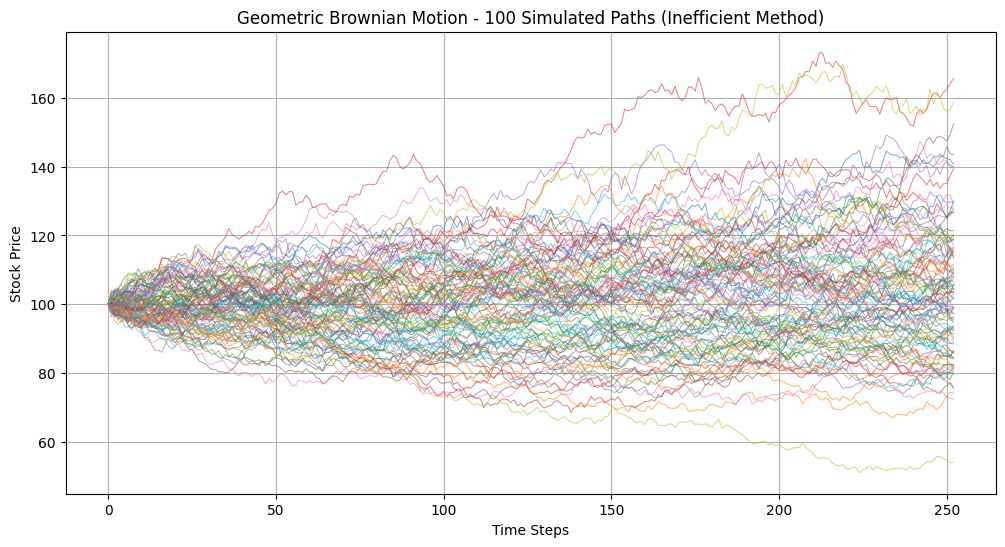

In [ ]:
# Plot the GBM paths
plt.figure(figsize=(12, 6))
for i in range(100):
    plt.plot(gbm_paths[:, i], lw=0.7, alpha=0.6)
plt.title('Geometric Brownian Motion - 100 Simulated Paths (Inefficient Method)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

# Do not use for loop in python as much as you can!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for GBM
np.random.seed(42)  # For reproducibility
S0 = 100            # Initial stock price
mu = 0.05           # Drift (annualized return)
sigma = 0.2         # Volatility (annualized standard deviation)
T = 1               # Time horizon in years
steps = 252         # Number of steps (daily steps for a year)
paths = 1000         # Number of paths to simulate

# Time increments
dt = T / steps

# Simulate GBM paths
gbm_paths = np.zeros((steps + 1, paths))
gbm_paths[0] = S0  # Initial price for all paths
current_time = time.time()
# Simulate paths using a loop for each path
for t in range(1, steps + 1):
    # Generate random noise
    z = np.random.normal(0, 1, paths)
    # Compute the price at time t
    gbm_paths[t] = gbm_paths[t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
end_time = time.time()
execution_time = end_time - current_time
print(f"Execution time: {execution_time} seconds")


Execution time: 0.015976905822753906 seconds


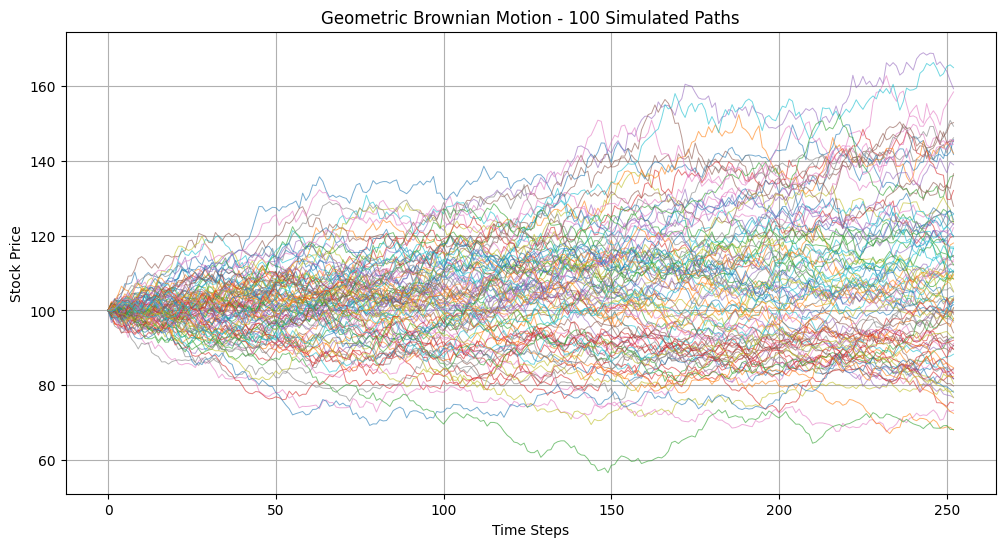

In [ ]:
# Plot the GBM paths
plt.figure(figsize=(12, 6))
for i in range(100):
    plt.plot(gbm_paths[:, i], lw=0.7, alpha=0.6)
plt.title('Geometric Brownian Motion - 100 Simulated Paths')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()


# Pandas

## Importing Libraries

In [5]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

 ## Fetching NVIDIA Stock Data

In [6]:

start_date = "2020-01-01"
end_date = "2025-01-01"
nvda_data = yf.download("NVDA", start=start_date, end=end_date)

# Rename the columns to remove potential multi-index
nvda_data.columns = ["Close", "High", "Low", "Open", "Volume"]

# Display the first few rows
nvda_data.head()


[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,5.972711,5.972711,5.893294,5.943832,237536000
2020-01-03,5.877113,5.920929,5.828068,5.852964,205384000
2020-01-06,5.901758,5.906986,5.757612,5.783753,262636000
2020-01-07,5.973208,6.019016,5.885078,5.930139,314856000
2020-01-08,5.984411,6.025738,5.928894,5.968975,277108000


In [7]:
nvda_data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [8]:
print("\nData Information:")
nvda_data.info()


Data Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Open    1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [9]:
print("\nDescriptive Statistics:")
nvda_data.describe()




Descriptive Statistics:


,Close,High,Low,Open,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,38.445948,39.156301,37.671665,38.450352,4.468056e+08
std,38.233881,38.944453,37.489330,38.295294,1.877132e+08
min,4.892426,5.229715,4.500834,4.984596,9.788400e+07
25%,13.573235,13.824407,13.338221,13.605262,3.084230e+08
50%,21.237932,21.744667,20.824598,21.172294,4.209180e+08
75%,45.626475,46.206088,44.970615,45.750924,5.467242e+08
max,148.869751,152.879470,146.249911,149.339720,1.543911e+09


In [10]:
# Check for missing values
print("\nChecking for Missing Values:")
print(nvda_data.isnull().sum())



Checking for Missing Values:
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


## Data Cleaning

In [11]:
# Rename columns for better readability
nvda_data.reset_index(inplace=True)  # Ensure 'Date' is a column, not an index


nvda_data

,Date,Close,High,Low,Open,Volume
0,2020-01-02,5.972711,5.972711,5.893294,5.943832,237536000
1,2020-01-03,5.877113,5.920929,5.828068,5.852964,205384000
2,2020-01-06,5.901758,5.906986,5.757612,5.783753,262636000
3,2020-01-07,5.973208,6.019016,5.885078,5.930139,314856000
4,2020-01-08,5.984411,6.025738,5.928894,5.968975,277108000
...,...,...,...,...,...,...
1253,2024-12-24,140.220001,141.899994,138.649994,140.000000,105157000
1254,2024-12-26,139.929993,140.850006,137.729996,139.699997,116205600
1255,2024-12-27,137.009995,139.020004,134.710007,138.550003,170582600
1256,2024-12-30,137.490005,140.270004,134.020004,134.830002,167734700


In [12]:
# Handle missing values
nvda_data.fillna(method="ffill", inplace=True)

print("\nCleaned Data:")
nvda_data.head()




Cleaned Data:


<ipython-input-12-ef11901829af>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nvda_data.fillna(method="ffill", inplace=True)


,Date,Close,High,Low,Open,Volume
0,2020-01-02,5.972711,5.972711,5.893294,5.943832,237536000
1,2020-01-03,5.877113,5.920929,5.828068,5.852964,205384000
2,2020-01-06,5.901758,5.906986,5.757612,5.783753,262636000
3,2020-01-07,5.973208,6.019016,5.885078,5.930139,314856000
4,2020-01-08,5.984411,6.025738,5.928894,5.968975,277108000


In [13]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=c2c7d5046db31129d8a89e02e1f7aa9680e37651359c87e83c9e576e91f9e6ee
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


# Features

## Moving Average Convergence Divergence (MACD)

The **Moving Average Convergence Divergence (MACD)** is a technical indicator used in financial analysis to identify trends and potential buy/sell signals based on the relationship between moving averages of an asset's price.

---

### 1. Exponential Moving Average (EMA)

The **Exponential Moving Average (EMA)** of a time series $P_t$ is calculated recursively as:

$$
\text{EMA}_t^{(\alpha)} =
\begin{cases}
P_t & \text{if } t = 1, \\
\alpha P_t + (1 - \alpha) \text{EMA}_{t-1}^{(\alpha)} & \text{if } t > 1,
\end{cases}
$$

where the smoothing factor \( \alpha \) is defined as:

$$
\alpha = \frac{2}{N+1},
$$

and \( N \) is the number of periods used for the moving average.

Alternatively, the EMA can be expressed explicitly using weighted summation:

$$
\text{EMA}_t^{(\alpha)} = \sum_{i=0}^{t-1} \alpha (1 - \alpha)^i P_{t-i}.
$$

---

### 2. MACD Line

The **MACD Line** is the difference between two EMAs of the price series, calculated over different time periods:

$$
\text{MACD}_t = \text{EMA}_t^{(\alpha_{\text{short}})} - \text{EMA}_t^{(\alpha_{\text{long}})},
$$

where:
- $ \alpha_{\text{short}} = \frac{2}{N_{\text{short}}+1}$ for the short-term EMA (e.g., $ N_{\text{short}} = 12 $ days),
- $ \alpha_{\text{long}} = \frac{2}{N_{\text{long}}+1} $ for the long-term EMA (e.g., $ N_{\text{long}} = 26 $ days).

---

### 3. Signal Line

The **Signal Line** is the EMA of the MACD line itself, typically computed over a shorter period $ N_{\text{signal}} $ (e.g., $ N_{\text{signal}} = 9 $ days):

$$
\text{Signal}_t = \text{EMA}_t^{(\alpha_{\text{signal}})} \quad \text{of } \text{MACD}_t,
$$

where $ \alpha_{\text{signal}} = \frac{2}{N_{\text{signal}}+1} $.

---


## Relative Strength Index (RSI)

The **Relative Strength Index (RSI)** is a momentum oscillator that measures the speed and change of price movements, ranging from 0 to 100. It helps identify overbought and oversold conditions.

---

### RSI Calculation

1. **Gain and Loss**:
   - Gain: $ \text{Gain}_t = \max(P_t - P_{t-1}, 0) $
   - Loss: $ \text{Loss}_t = \max(P_{t-1} - P_t, 0) $

2. **Average Gain and Loss** (initially over $ N $ periods, typically $ N = 14 $):
   - $ \text{Avg Gain}_t = \frac{\sum_{i=0}^{N-1} \text{Gain}_{t-i}}{N} $
   - $ \text{Avg Loss}_t = \frac{\sum_{i=0}^{N-1} \text{Loss}_{t-i}}{N} $

   Afterward, averages are smoothed:
   - $ \text{Avg Gain}_t = \frac{(N-1) \cdot \text{Avg Gain}_{t-1} + \text{Gain}_t}{N} $
   - $ \text{Avg Loss}_t = \frac{(N-1) \cdot \text{Avg Loss}_{t-1} + \text{Loss}_t}{N} $

3. **Relative Strength (RS)**:
   - $ \text{RS}_t = \frac{\text{Avg Gain}_t}{\text{Avg Loss}_t} $

4. **RSI**:
   - $ \text{RSI}_t = 100 - \frac{100}{1 + \text{RS}_t} $

---

### Interpretation

- **Overbought**: $ \text{RSI} > 70 $
- **Oversold**: $ \text{RSI} < 30 $
- **Neutral**: $ 30 \leq \text{RSI} \leq 70 $

The RSI is used to detect potential reversals, momentum strength, and overbought/oversold conditions.


In [14]:

from ta.momentum import RSIIndicator
from ta.trend import SMAIndicator, EMAIndicator, MACD

def compute_technical_indicators(data):
    """
    Computes technical indicators for a given dataset of a stock.

    Parameters:
    - data (pd.DataFrame): DataFrame containing stock data with columns:
                           ['Open', 'High', 'Low', 'Close', 'Volume']

    Returns:
    - pd.DataFrame: Enhanced DataFrame with additional columns for technical indicators and lagged returns.
    """
    # Ensure the dataset has the required columns
    required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    if not all(col in data.columns for col in required_columns):
        raise ValueError(f"Dataset must contain the following columns: {required_columns}")

    # Simple Moving Average (SMA)
    data['SMA_20'] = SMAIndicator(close=data['Close'], window=20).sma_indicator()
    data['SMA_50'] = SMAIndicator(close=data['Close'], window=50).sma_indicator()

    # Exponential Moving Average (EMA)
    data['EMA_20'] = EMAIndicator(close=data['Close'], window=20).ema_indicator()
    data['EMA_50'] = EMAIndicator(close=data['Close'], window=50).ema_indicator()

    # Relative Strength Index (RSI)
    data['RSI'] = RSIIndicator(close=data['Close'], window=14).rsi()

    # Moving Average Convergence Divergence (MACD)
    macd_indicator = MACD(close=data['Close'], window_slow=26, window_fast=12, window_sign=9)
    data['MACD'] = macd_indicator.macd()
    data['MACD_Signal'] = macd_indicator.macd_signal()

    # Returns and lagged returns
    data['Return'] = data['Close'].pct_change()
    data['Lag_Return_1'] = data['Return'].shift(1)
    data['Lag_Return_2'] = data['Return'].shift(2)
    data['Lag_Return_3'] = data['Return'].shift(3)

    # Tomorrow's return (forward-looking)
    data['Tomorrow_Return'] = data['Return'].shift(-1)

    # Dropping NaN values caused by rolling calculations
    data = data.dropna()

    return data



##6. Visualization

In [15]:
nvda_data = compute_technical_indicators(nvda_data)

In [16]:
nvda_data

,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,EMA_50,RSI,MACD,MACD_Signal,Return,Lag_Return_1,Lag_Return_2,Lag_Return_3,Tomorrow_Return
49,2020-03-13,5.999450,6.003934,5.470600,5.741875,634836000,6.731322,6.406614,6.452557,6.418307,44.435984,-0.139985,0.004276,0.113402,-0.122368,-0.055960,0.063722,-0.184521
50,2020-03-16,4.892426,5.632269,4.832641,5.291244,726972000,6.615218,6.385008,6.303973,6.358468,35.289277,-0.244615,-0.045502,-0.184521,0.113402,-0.122368,-0.055960,0.106263
51,2020-03-17,5.412309,5.501738,4.757910,5.004773,833632000,6.516669,6.375712,6.219052,6.321364,41.390676,-0.282330,-0.092868,0.106263,-0.184521,0.113402,-0.122368,-0.066507
52,2020-03-18,5.052352,5.229715,4.500834,4.984596,874268000,6.377554,6.358724,6.107938,6.271599,38.671872,-0.337376,-0.141770,-0.066507,0.106263,-0.184521,0.113402,0.050044
53,2020-03-19,5.305194,5.398858,4.817446,5.030929,765512000,6.258550,6.345363,6.031486,6.233701,41.574949,-0.356489,-0.184713,0.050044,-0.066507,0.106263,-0.184521,-0.033902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2024-12-23,139.669998,139.789993,135.119995,136.279999,176053500,136.956157,139.710810,136.706485,136.175009,53.425803,-1.653788,-1.353346,0.036897,0.030762,0.013730,-0.011351,0.003938
1253,2024-12-24,140.220001,141.899994,138.649994,140.000000,105157000,137.166625,139.754000,137.041106,136.333636,54.123013,-1.154779,-1.313633,0.003938,0.036897,0.030762,0.013730,-0.002068
1254,2024-12-26,139.929993,140.850006,137.729996,139.699997,116205600,137.317596,139.920781,137.316238,136.474670,53.666814,-0.773792,-1.205665,-0.002068,0.003938,0.036897,0.030762,-0.020868
1255,2024-12-27,137.009995,139.020004,134.710007,138.550003,170582600,137.401563,139.946768,137.287072,136.495663,49.172618,-0.699414,-1.104415,-0.020868,-0.002068,0.003938,0.036897,0.003503


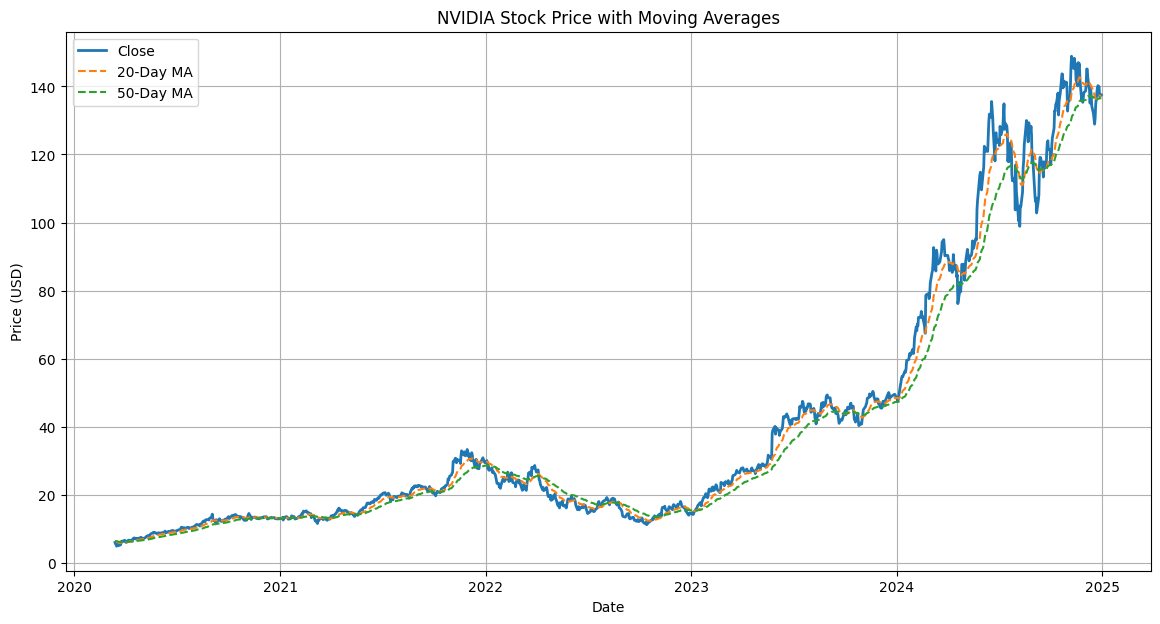

In [17]:

# Plot Adjusted Close and Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(nvda_data["Date"], nvda_data["Close"], label="Close", linewidth=2)
plt.plot(nvda_data["Date"], nvda_data["EMA_20"], label="20-Day MA", linestyle="--")
plt.plot(nvda_data["Date"], nvda_data["EMA_50"], label="50-Day MA", linestyle="--")
plt.title("NVIDIA Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()



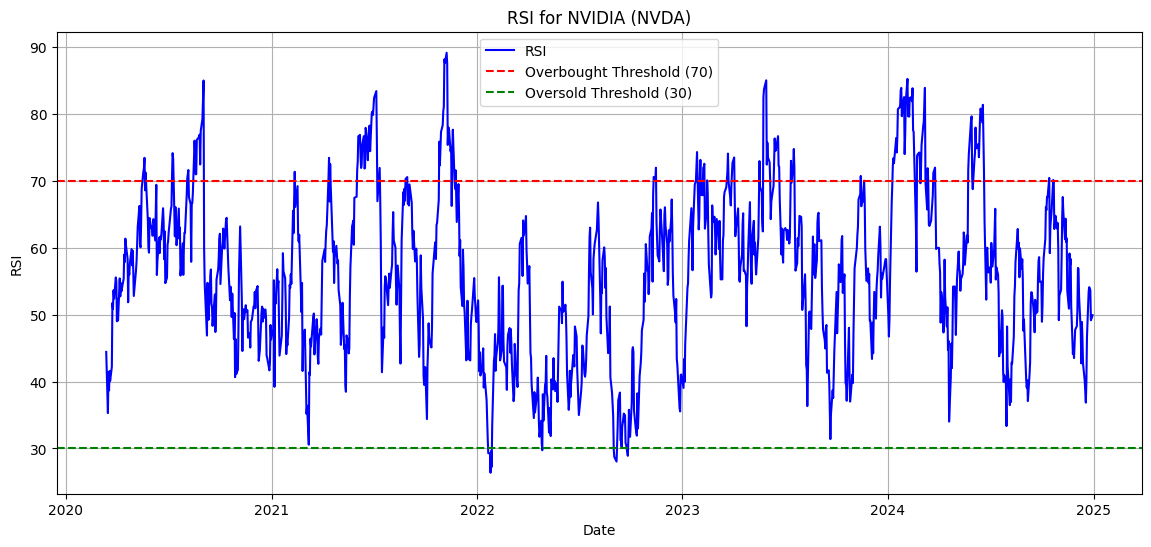

In [18]:
# Plot RSI
plt.figure(figsize=(14, 6))
plt.plot(nvda_data['Date'], nvda_data['RSI'], label='RSI', color='blue')
plt.axhline(70, color='red', linestyle='--', label='Overbought Threshold (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold Threshold (30)')
plt.title('RSI for NVIDIA (NVDA)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid()
plt.show()



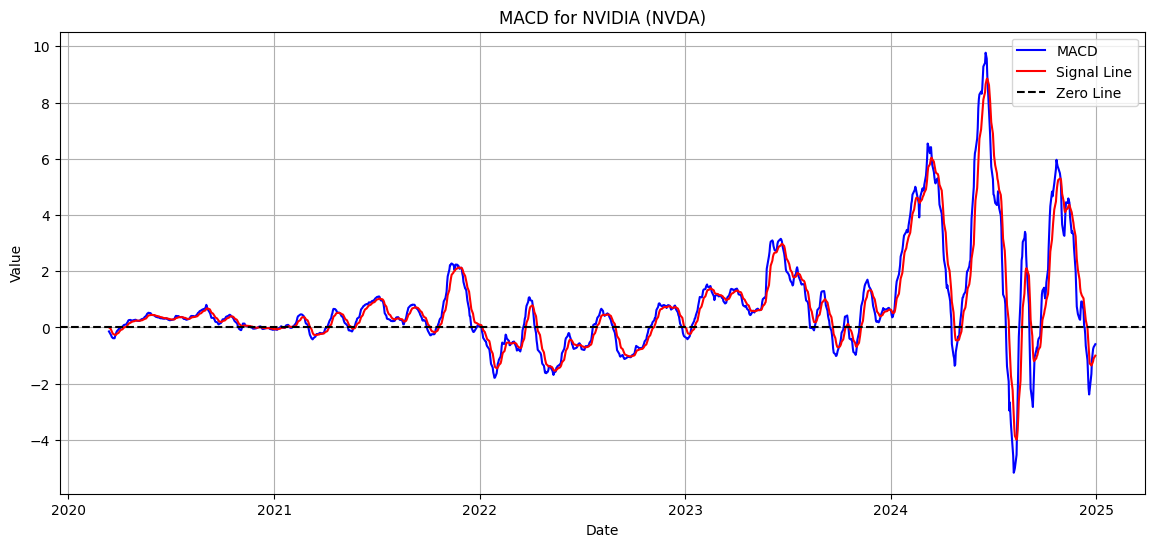

In [19]:
# Plot MACD and Signal Line
plt.figure(figsize=(14, 6))
plt.plot(nvda_data['Date'], nvda_data['MACD'], label='MACD', color='blue')
plt.plot(nvda_data['Date'], nvda_data['MACD_Signal'], label='Signal Line', color='red')
plt.axhline(0, color='black', linestyle='--', label='Zero Line')
plt.title('MACD for NVIDIA (NVDA)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

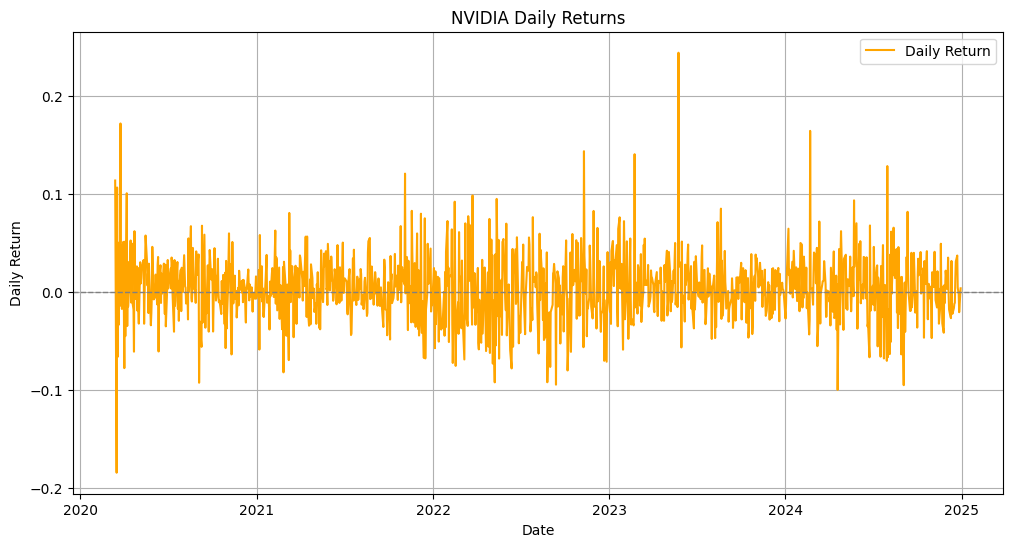

In [21]:
# Plot Daily Returns
plt.figure(figsize=(12, 6))
plt.plot(nvda_data["Date"], nvda_data["Return"], label="Daily Return", color="orange")
plt.axhline(y=0, color="gray", linestyle="--", linewidth=1)
plt.title("NVIDIA Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.grid()
plt.show()




In [25]:
nvda_data

,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,EMA_50,RSI,MACD,MACD_Signal,Return,Lag_Return_1,Lag_Return_2,Lag_Return_3,Tomorrow_Return
49,2020-03-13,5.999450,6.003934,5.470600,5.741875,634836000,6.731322,6.406614,6.452557,6.418307,44.435984,-0.139985,0.004276,0.113402,-0.122368,-0.055960,0.063722,-0.184521
50,2020-03-16,4.892426,5.632269,4.832641,5.291244,726972000,6.615218,6.385008,6.303973,6.358468,35.289277,-0.244615,-0.045502,-0.184521,0.113402,-0.122368,-0.055960,0.106263
51,2020-03-17,5.412309,5.501738,4.757910,5.004773,833632000,6.516669,6.375712,6.219052,6.321364,41.390676,-0.282330,-0.092868,0.106263,-0.184521,0.113402,-0.122368,-0.066507
52,2020-03-18,5.052352,5.229715,4.500834,4.984596,874268000,6.377554,6.358724,6.107938,6.271599,38.671872,-0.337376,-0.141770,-0.066507,0.106263,-0.184521,0.113402,0.050044
53,2020-03-19,5.305194,5.398858,4.817446,5.030929,765512000,6.258550,6.345363,6.031486,6.233701,41.574949,-0.356489,-0.184713,0.050044,-0.066507,0.106263,-0.184521,-0.033902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2024-12-23,139.669998,139.789993,135.119995,136.279999,176053500,136.956157,139.710810,136.706485,136.175009,53.425803,-1.653788,-1.353346,0.036897,0.030762,0.013730,-0.011351,0.003938
1253,2024-12-24,140.220001,141.899994,138.649994,140.000000,105157000,137.166625,139.754000,137.041106,136.333636,54.123013,-1.154779,-1.313633,0.003938,0.036897,0.030762,0.013730,-0.002068
1254,2024-12-26,139.929993,140.850006,137.729996,139.699997,116205600,137.317596,139.920781,137.316238,136.474670,53.666814,-0.773792,-1.205665,-0.002068,0.003938,0.036897,0.030762,-0.020868
1255,2024-12-27,137.009995,139.020004,134.710007,138.550003,170582600,137.401563,139.946768,137.287072,136.495663,49.172618,-0.699414,-1.104415,-0.020868,-0.002068,0.003938,0.036897,0.003503


In [28]:
montly_return = nvda_data['Return'].resample('M').sum()

<ipython-input-28-5e978347afb0>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  nvda_data['Return'].resample('M').sum()


,Return
Date,
2020-03-31,0.248956
2020-04-30,0.122833
2020-05-31,0.202475
2020-06-30,0.074379
2020-07-31,0.116009
2020-08-31,0.238187
2020-09-30,0.027971
2020-10-31,-0.069493
2020-11-30,0.076402


In [26]:
nvda_data.set_index('Date', inplace=True)

In [32]:
montly_return = nvda_data['Return'].resample('M').sum()

<ipython-input-32-4948e9303268>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  montly_return = nvda_data['Return'].resample('M').sum()


In [29]:
realized_volatility = nvda_data['Return'].resample('M').std()

<ipython-input-29-90013640ff4b>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  realized_volatility = nvda_data['Return'].resample('M').std()


In [30]:
realized_volatility

,Return
Date,
2020-03-31,0.090128
2020-04-30,0.044086
2020-05-31,0.027329
2020-06-30,0.023895
2020-07-31,0.020776
2020-08-31,0.024374
2020-09-30,0.039842
2020-10-31,0.025503
2020-11-30,0.031268


In [33]:
result = pd.DataFrame({
        'Monthly_Return': montly_return,
        'Realized_Volatility': realized_volatility
    })

In [34]:
result

,Monthly_Return,Realized_Volatility
Date,,
2020-03-31,0.248956,0.090128
2020-04-30,0.122833,0.044086
2020-05-31,0.202475,0.027329
2020-06-30,0.074379,0.023895
2020-07-31,0.116009,0.020776
2020-08-31,0.238187,0.024374
2020-09-30,0.027971,0.039842
2020-10-31,-0.069493,0.025503
2020-11-30,0.076402,0.031268


In [22]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import numpy as np

### Distribution of returns & Fat tail distribution  

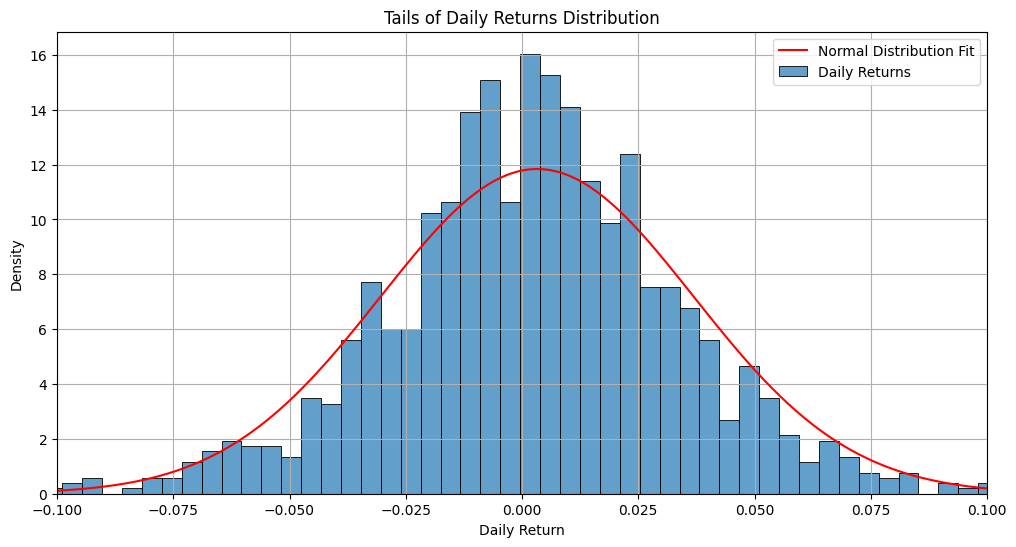

In [35]:
# Fit a normal distribution to the daily returns
mean_return = nvda_data["Return"].mean()
std_return = nvda_data["Return"].std()

# Generate a normal distribution curve
x = np.linspace(nvda_data["Return"].min(), nvda_data["Return"].max(), 1000)
pdf = norm.pdf(x, mean_return, std_return)




# Compare the tails
plt.figure(figsize=(12, 6))
sns.histplot(nvda_data["Return"], bins=100, kde=False, label="Daily Returns", stat="density", alpha=0.7)
plt.plot(x, pdf, color="red", label="Normal Distribution Fit")
plt.xlim(-0.1,0.1)
plt.title("Tails of Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

In [36]:
std_return

0.03369074732908927

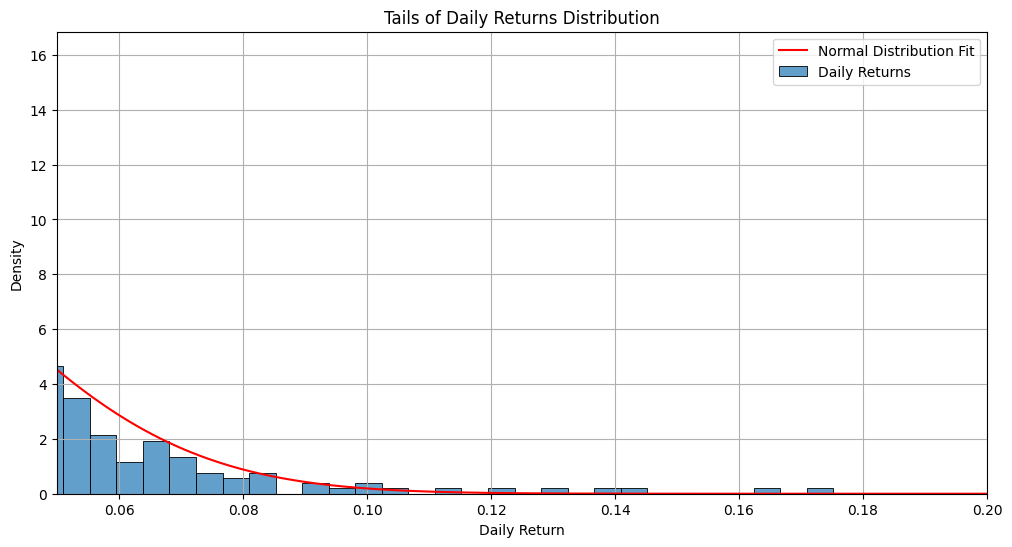

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(nvda_data["Return"], bins=100, kde=False, label="Daily Returns", stat="density", alpha=0.7)
plt.plot(x, pdf, color="red", label="Normal Distribution Fit")
plt.xlim(0.05,0.2)  # Focus on the tails
plt.title("Tails of Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

In [38]:
# Compute the probability that the normal distribution is greater than 0.1
probability_greater_0_1 = 1 - norm.cdf(0.1, loc=mean_return, scale=std_return)
probability_greater_0_1


0.0020406002821969915

In [40]:
np.sum(nvda_data["Return"] > 0.1)/len(nvda_data)

0.008278145695364239

As we can see the probabilty of tail in real data is more that 3 times to the probabilty of the tail normal distribution

In [ ]:
nvda_data.to_csv("nvda_stock_data.csv", index=False)

# Creating Dataset

In [ ]:

from datetime import datetime, timedelta

def get_tickers_and_sectors_from_wikipedia(url):
    """
    Scrapes ticker symbols and sectors from a Wikipedia page.
    :param url: URL of the Wikipedia page with ticker symbols and sectors
    :return: DataFrame with 'Ticker' and 'Sector'
    """
    tables = pd.read_html(url)
    for table in tables:
        if 'Symbol' in table.columns and 'GICS Sector' in table.columns:
            # Rename columns for consistency
            table = table.rename(columns={"Symbol": "Ticker", "GICS Sector": "Sector"})
            return table[['Ticker', 'Sector']]
    return pd.DataFrame()  # Return empty DataFrame if not found

# Define the Wikipedia URL (example: S&P 500 companies)
wiki_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
tickers_and_sectors = get_tickers_and_sectors_from_wikipedia(wiki_url)


In [43]:
dictionary = {}

dictionary['Names'] = ["Alex" , "John"]
dictionary["Ages"] = [22,23]

In [44]:
dictionary.keys()

dict_keys(['Names', 'Ages'])

In [45]:
profile = {}

In [46]:
profile['Alex'] = {'Age':22 , 'Gender':'Male' , 'Degree' : 'Master'}
profile['John'] = {'Age':23 , 'Gender':'Male', 'Degree' : 'PhD'}

In [ ]:
from tqdm import tqdm


start_date = (datetime.now() - timedelta(days=365 * 20)).strftime('%Y-%m-%d')  # 20 years ago
end_date = datetime.now().strftime('%Y-%m-%d')

icker_data_dict = {}

# Use tqdm to show a progress bar
for _, row in tqdm(tickers_and_sectors.iterrows(), total=len(tickers_and_sectors), desc="Processing Tickers"):
    ticker = row['Ticker']
    sector = row['Sector']
    try:
        # Download historical data
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)
        data.columns = ["Close", "High", "Low", "Open", "Volume"]


        # Add ticker and sector columns
        data['Ticker'] = ticker
        data['Sector'] = sector
        data = compute_technical_indicators(data)
        # Store the data in the dictionary with ticker as the key
        icker_data_dict[ticker] = data
    except Exception as e:
        print(f"\nFailed to process {ticker}: {e}")


Processing Tickers:  12%|█▏        | 60/503 [00:16<02:48,  2.63it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
Processing Tickers:  12%|█▏        | 61/503 [00:17<04:09,  1.77it/s]


Failed to process BRK.B: Length mismatch: Expected axis has 6 elements, new values have 5 elements


Processing Tickers:  15%|█▍        | 75/503 [00:21<02:01,  3.53it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2005-01-24 -> 2025-01-19)')
Processing Tickers:  15%|█▌        | 77/503 [00:21<01:31,  4.67it/s]


Failed to process BF.B: Length mismatch: Expected axis has 6 elements, new values have 5 elements


Processing Tickers: 100%|██████████| 503/503 [02:16<00:00,  3.69it/s]


## Saving Dataset

In [ ]:
import pickle

# Save the dictionary to a file
with open('ticker_data_dict.pkl', 'wb') as file:
    pickle.dump(icker_data_dict, file)


In [ ]:
# Load the dictionary from the file
with open('ticker_data_dict.pkl', 'rb') as file:
    loaded_dict = pickle.load(file)

# Now, `loaded_dict` contains your original dictionary


## Feature Analysis

In this section, our goal is to determine which features are most effective at explaining tomorrow's returns. As a first step, we focus on the squared correlation coefficient. In the context of linear regression, this value corresponds to the coefficient of determination, commonly known as
$ R^2 $, which measures the proportion of variance in tomorrow's returns explained by each feature.

In [ ]:
selected_columns = ['SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'RSI', 'MACD', 'MACD_Signal','Return' ,  'Lag_Return_1', 'Lag_Return_2', 'Lag_Return_3' , 'Tomorrow_Return']

In [ ]:
icker_data_dict['AAPL'][selected_columns].corr()

,SMA_20,SMA_50,EMA_20,EMA_50,RSI,MACD,MACD_Signal,Return,Lag_Return_1,Lag_Return_2,Lag_Return_3,Tomorrow_Return
SMA_20,1.000000,0.998762,0.999930,0.999351,-0.034015,0.278996,0.310618,-0.014410,-0.012582,-0.012432,-0.011473,-0.014711
SMA_50,0.998762,1.000000,0.998836,0.999809,-0.051381,0.239851,0.265837,-0.014526,-0.013105,-0.013292,-0.012694,-0.014406
EMA_20,0.999930,0.998836,1.000000,0.999432,-0.030346,0.282891,0.311352,-0.013844,-0.011642,-0.011143,-0.009963,-0.014678
EMA_50,0.999351,0.999809,0.999432,1.000000,-0.044464,0.254357,0.280669,-0.014186,-0.012548,-0.012542,-0.011764,-0.014317
RSI,-0.034015,-0.051381,-0.030346,-0.044464,1.000000,0.508559,0.413168,0.318436,0.298166,0.275193,0.254762,0.007901
MACD,0.278996,0.239851,0.282891,0.254357,0.508559,1.000000,0.952611,0.034535,0.064220,0.087243,0.103015,-0.007406
MACD_Signal,0.310618,0.265837,0.311352,0.280669,0.413168,0.952611,1.000000,0.000829,0.014272,0.030031,0.045976,-0.008112
Return,-0.014410,-0.014526,-0.013844,-0.014186,0.318436,0.034535,0.000829,1.000000,-0.028220,-0.018049,-0.003276,-0.028371
Lag_Return_1,-0.012582,-0.013105,-0.011642,-0.012548,0.298166,0.064220,0.014272,-0.028220,1.000000,-0.027888,-0.018227,-0.017814
Lag_Return_2,-0.012432,-0.013292,-0.011143,-0.012542,0.275193,0.087243,0.030031,-0.018049,-0.027888,1.000000,-0.027556,-0.003047


In [ ]:
icker_data_dict['AAPL'][selected_columns].corr()['Tomorrow_Return'][:-1]**2

,Tomorrow_Return
SMA_20,0.000216
SMA_50,0.000208
EMA_20,0.000215
EMA_50,0.000205
RSI,0.000062
MACD,0.000055
MACD_Signal,0.000066
Return,0.000805
Lag_Return_1,0.000317
Lag_Return_2,0.000009


In [ ]:
corr_result = []

for x in icker_data_dict.keys():
    corr = (icker_data_dict[x][selected_columns].corr()['Tomorrow_Return'][:-1])**2
    corr_result.append(corr)



In [ ]:
corr_result = pd.DataFrame(corr_result)

In [ ]:
mean_abs_corr = corr_result.mean()

sorted_corr = mean_abs_corr.sort_values(ascending=False)

sorted_corr

,0
Return,0.003856
Lag_Return_3,0.001276
RSI,0.000937
Lag_Return_1,0.000713
MACD,0.000693
Lag_Return_2,0.000613
EMA_20,0.000609
SMA_20,0.000602
MACD_Signal,0.000601
EMA_50,0.000564


## Momentum effect!

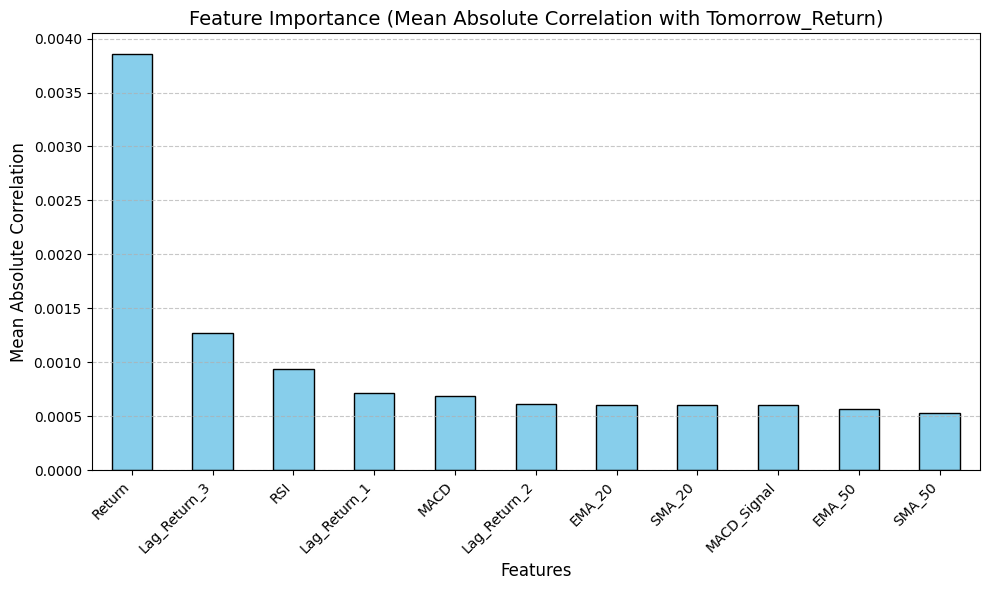

In [ ]:
# Plot bar chart
plt.figure(figsize=(10, 6))
sorted_corr.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Feature Importance (Mean Absolute Correlation with Tomorrow_Return)', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Mean Absolute Correlation', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Exercise:

Dose it hold for montly data?